In [1]:
%load_ext autoreload
%autoreload 2

In [276]:
from recursive_ma.estimator import constructions, construction_ma, estimate_ma, augment, n_constructions
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
from operator import add
from functools import reduce
from tqdm.auto import tqdm

In [3]:
# %%
test_data = {450.0: {120.0: {}, 300.0: {}, 80.0: {}, 220.0: {}, 51.0: {}, 29.01: {}}}
test_data2 = {
    647.8: {
        102.1: {},
    }
}
import random
test_data_big = [
    {random.random() * 200.0 + 250.0: {random.random() * 200.0 + 50.0: {} for _ in range(15)}}
    for _ in range(100)
    # {1150.0: {random.random() * 400.0 + 50.0: {} for _ in range(100)}},
]
joint_data = [test_data, test_data2]
# test_data = {450.0: {150: {120:{}, 60:{}}, 300: {150: {}, 120:{}}}}
# %%
test_agumented = augment(test_data, 0.1)
test_agumented2 = augment(test_data2, 0.1)
joint_agumented = [test_agumented, test_agumented2]

In [4]:
amit_data = pickle.load(open("trees AMK2-48.pickle", "rb"))

In [5]:
with open("trees AMK2-48-treeonly.pickle", "wb") as f:
    pickle.dump(amit_data['trees'], f)

In [ ]:
list(constructions(test_data[450.0], 450.0, 0.1))
# %%

In [ ]:
list(constructions(test_agumented[450.0], 450.0, 0.1))

In [ ]:
list(constructions(joint_data, None, 0.1))

In [ ]:
list(constructions(joint_agumented, None, 0.1))

In [ ]:
{c: construction_ma(c, 0.1) for c in constructions(joint_agumented, None, 0.1)}

In [ ]:
{c: construction_ma(c, 0.1) for c in constructions(joint_data, None, 0.1)}

In [92]:
data = {sample_name: [{ms1_peak: tree} for ms1_peak, tree in sample_data.items()] for sample_name, sample_data in amit_data['trees'].items()}

In [93]:
data['H']

[{305.1568: {305.1572: {}}},
 {379.1929: {379.1929: {}}},
 {227.139: {227.139: {}}},
 {261.123: {261.1153: {}, 261.1198: {}, 261.1243: {}}},
 {207.0988: {207.0988: {}}},
 {453.3444: {453.3444: {}}},
 {475.3254: {475.3254: {}}},
 {273.1676: {273.1638: {}, 273.1686: {}}},
 {185.1148: {185.1148: {}}},
 {340.2596: {100.0752: {},
   111.0432: {},
   128.069: {},
   128.0721: {},
   163.6416: {},
   163.645: {},
   182.1506: {},
   209.1657: {},
   210.1433: {},
   210.1482: {},
   210.1531: {},
   213.1743: {},
   213.1777: {},
   213.181: {},
   227.6767: {},
   277.2286: {},
   326.2762: {},
   326.2794: {},
   326.2825: {},
   326.2857: {},
   331.2512: {},
   331.2545: {},
   331.2577: {},
   331.2609: {},
   331.7534: {},
   331.7599: {},
   340.248: {},
   340.2514: {},
   340.2548: {},
   340.2581: {},
   340.2615: {}}},
 {359.2329: {359.2171: {},
   359.2244: {},
   359.2281: {},
   359.2318: {},
   359.2354: {}}},
 {701.4943: {78.0535: {}, 78.0568: {}, 701.4943: {}}},
 {679.5124: {

In [278]:
np.log10(1.0*n_constructions(data['H'] + data['I'], None, 0.003))

71.9348791664952

In [115]:
6692894941799285941596907802600644506752409938165760000000000 / 1194623608518980694801502270635510218850342922799043034742784000000000000000

5.602513539889536e-15

In [139]:
next(c[1] for c in estimate_ma(data['H'], 0.1))

1891.4820643750006

In [ ]:
len(list((c[1] for c in estimate_ma(data['H'][:12], 0.1))))

In [195]:
def partition(l, n):
    list_in = l.copy()
    random.shuffle(list_in)
    return [list_in[i::n] for i in range(n)]

In [306]:
guess = reduce(
    lambda acc, x: (acc[0] + x[0][0], acc[1] + x[0][1], acc[2] + x[1]),
    (min((ma for ma in estimate_ma(part, 0.003)), key=lambda x: x[0]) for part in tqdm(partition(data['H'] + data['I'], 30))),
    ((), (), 0.0)
    )
guess

100%|██████████| 30/30 [00:19<00:00,  1.56it/s]


((261.1229,
  195.1226,
  91.9554,
  103.16720000000001,
  663.4517,
  73.7161,
  589.7356,
  278.2484,
  103.1229,
  69.0691,
  34.053799999999995,
  118.0863,
  273.1674,
  148.0601,
  103.1231,
  41.0385,
  62.084599999999995,
  301.1417,
  211.1079,
  68.0493,
  143.0586,
  263.2373,
  214.1264,
  101.9999,
  112.1265,
  288.2535,
  146.1177,
  45.0335,
  101.08420000000001,
  308.0909,
  227.1392,
  326.3774,
  186.2215,
  464.3346,
  100.1108,
  364.22380000000004,
  284.2964,
  104.1069,
  45.0333,
  59.0736,
  116.0704,
  215.1254,
  147.1128,
  85.0837,
  62.0291,
  309.204,
  187.1078,
  70.0641,
  117.0437,
  290.2707,
  306.2772,
  230.2482,
  663.4561,
  73.7164,
  589.7397,
  270.1564,
  340.2597,
  83.0852,
  257.1745,
  242.2483,
  308.0911,
  162.0224,
  146.06869999999998,
  320.2357,
  185.0918,
  460.2695,
  701.4945,
  163.0388,
  254.248,
  559.5207,
  67.0535,
  492.46720000000005,
  102.1277,
  58.065,
  44.06270000000001,
  185.1148,
  243.0474,
  349.1833,
  3

In [308]:
construction_ma(guess[:2], 0.003), guess[2]

(36.0, -5.990299999999891)

In [307]:
list(unique(sorted(guess[0]), 0.003))

[14.035899999999998,
 27.99599999999998,
 31.024599999999992,
 34.053799999999995,
 41.0385,
 42.01130000000002,
 44.0274,
 44.0491,
 44.06270000000001,
 45.011700000000005,
 45.0333,
 46.065,
 55.0536,
 56.9644,
 57.0694,
 58.02669999999999,
 58.0644,
 59.0736,
 60.0546,
 60.0796,
 62.028999999999996,
 62.084599999999995,
 64.0164,
 67.0535,
 67.9886,
 68.0491,
 69.0691,
 70.0172,
 70.064,
 73.4994,
 73.7161,
 74.0593,
 81.0698,
 83.0852,
 83.98500000000001,
 84.9587,
 85.0837,
 88.0527,
 90.974,
 91.0529,
 91.9553,
 96.06970000000001,
 98.9838,
 100.0752,
 100.1108,
 101.08420000000001,
 101.9999,
 102.1277,
 103.1229,
 103.16720000000001,
 104.1069,
 105.0334,
 106.9436,
 106.9484,
 108.0807,
 108.9584,
 109.1221,
 111.0225,
 111.1168,
 112.1265,
 114.0663,
 114.0912,
 115.0638,
 116.0704,
 117.04280000000001,
 118.0863,
 120.0793,
 120.9795,
 124.0746,
 130.05,
 130.1591,
 132.1017,
 135.9765,
 136.0525,
 139.05,
 140.068,
 143.0586,
 145.1811,
 146.06869999999998,
 146.1176,
 147.

In [280]:
from recursive_ma.estimator import unique, overlapping

In [284]:
guess

((246.2432,
  118.0863,
  304.2608,
  246.2433,
  67.0541,
  179.1892,
  278.2484,
  153.0338,
  111.0225,
  42.01130000000002,
  175.1191,
  60.0553,
  115.0638,
  405.2604,
  213.1459,
  235.1191,
  330.2763,
  211.1079,
  463.3881,
  265.2523,
  55.0536,
  210.19869999999997,
  274.2734,
  256.2637,
  187.1078,
  70.0641,
  117.0437,
  239.1615,
  701.4945,
  166.0865,
  56.9644,
  109.1221,
  559.5207,
  67.0535,
  492.46720000000005,
  120.9795,
  106.9436,
  14.035899999999998,
  563.5525,
  67.0541,
  496.4984,
  139.05,
  427.2506,
  132.1019,
  368.2466,
  226.9519,
  279.1587,
  149.0242,
  130.1345,
  296.2954,
  57.0694,
  239.22599999999997,
  679.5129,
  73.4994,
  606.0134999999999,
  290.2695,
  309.204,
  147.1127,
  85.0837,
  62.028999999999996,
  207.0987,
  185.0918,
  226.9511,
  90.974,
  135.9771,
  114.0912,
  227.1255,
  272.2583,
  57.0695,
  215.18880000000001,
  146.1176,
  45.0334,
  101.08420000000001,
  282.2788,
  239.1486,
  256.2636,
  130.05,
  46.06

In [287]:
sorted(guess[0])

[14.035899999999998,
 15.037499999999994,
 19.02260000000001,
 27.99599999999998,
 31.024599999999992,
 41.0385,
 42.01130000000002,
 44.0274,
 44.06270000000001,
 45.011700000000005,
 45.011700000000005,
 45.0333,
 45.0334,
 45.0335,
 46.065,
 55.0534,
 55.0536,
 55.0536,
 55.0536,
 55.0536,
 55.0536,
 55.0538,
 56.0489,
 56.9644,
 56.9644,
 57.0694,
 57.0694,
 57.0694,
 57.0695,
 57.0696,
 57.0696,
 57.0698,
 57.0698,
 58.02669999999999,
 58.0647,
 58.065,
 59.0736,
 60.03420000000003,
 60.03580000000002,
 60.0546,
 60.0553,
 60.0796,
 62.028999999999996,
 62.084599999999995,
 64.0164,
 67.0535,
 67.0535,
 67.0541,
 67.0541,
 67.0541,
 67.9886,
 67.9896,
 68.0491,
 69.0695,
 70.064,
 70.0641,
 70.0644,
 70.0644,
 70.0647,
 73.4994,
 73.4994,
 73.7164,
 74.0593,
 78.0535,
 81.0698,
 83.0852,
 83.0852,
 83.98500000000001,
 84.9587,
 84.9588,
 84.9592,
 85.0837,
 88.0527,
 90.974,
 90.9745,
 90.9755,
 91.0286,
 91.0527,
 91.0529,
 91.0542,
 91.9553,
 91.9554,
 92.0112,
 96.0697000000000

In [294]:
list(overlapping(sorted(guess[0]), 0.001))

[14.035899999999998,
 45.011700000000005,
 45.0334,
 45.0335,
 55.0536,
 55.0536,
 55.0536,
 55.0536,
 55.0536,
 55.0538,
 56.9644,
 57.0694,
 57.0694,
 57.0695,
 57.0696,
 57.0696,
 57.0698,
 57.0698,
 58.065,
 60.0553,
 67.0535,
 67.0541,
 67.0541,
 67.0541,
 67.9896,
 70.0641,
 70.0644,
 70.0644,
 70.0647,
 73.4994,
 83.0852,
 84.9588,
 84.9592,
 90.9745,
 90.9755,
 91.0529,
 91.9554,
 96.06970000000001,
 101.08420000000001,
 103.1231,
 103.16720000000001,
 104.107,
 106.949,
 115.0644,
 116.0706,
 117.0437,
 118.0863,
 120.0793,
 120.0809,
 132.1019,
 135.9771,
 135.97719999999998,
 139.05,
 146.1177,
 147.1128,
 148.0603,
 149.0242,
 155.0813,
 158.9641,
 163.0392,
 165.091,
 166.0865,
 171.16320000000002,
 175.1191,
 181.0285,
 181.0498,
 182.0814,
 185.0919,
 185.1149,
 194.1178,
 194.139,
 195.1226,
 207.0988,
 210.199,
 211.1079,
 213.1459,
 215.18880000000001,
 217.1044,
 226.2169,
 226.9519,
 227.1255,
 227.1392,
 227.2259,
 228.2326,
 230.2482,
 239.1486,
 239.1615,
 242.24

In [237]:
min(zip((c[1] for c in estimate_ma(data['H']+data['I'], 0.003)), range(10)), key=lambda x: x[0])

(3105.2464718945307, 8)

In [126]:
list(estimate_ma(data['H'], 0.1))

{'tree': [{305.1568: {305.1572: {}}}, {379.1929: {379.1929: {}}}, {227.139: {227.139: {}}}, {261.123: {261.1153: {}, 261.1198: {}, 261.1243: {}}}, {207.0988: {207.0988: {}}}, {453.3444: {453.3444: {}}}, {475.3254: {475.3254: {}}}, {273.1676: {273.1638: {}, 273.1686: {}}}, {185.1148: {185.1148: {}}}, {340.2596: {100.0752: {}, 111.0432: {}, 128.069: {}, 128.0721: {}, 163.6416: {}, 163.645: {}, 182.1506: {}, 209.1657: {}, 210.1433: {}, 210.1482: {}, 210.1531: {}, 213.1743: {}, 213.1777: {}, 213.181: {}, 227.6767: {}, 277.2286: {}, 326.2762: {}, 326.2794: {}, 326.2825: {}, 326.2857: {}, 331.2512: {}, 331.2545: {}, 331.2577: {}, 331.2609: {}, 331.7534: {}, 331.7599: {}, 340.248: {}, 340.2514: {}, 340.2548: {}, 340.2581: {}, 340.2615: {}}}, {359.2329: {359.2171: {}, 359.2244: {}, 359.2281: {}, 359.2318: {}, 359.2354: {}}}, {701.4943: {78.0535: {}, 78.0568: {}, 701.4943: {}}}, {679.5124: {73.4994: {}, 75.5027: {}, 75.6141: {}, 83.0842: {}, 110.0588: {}, 111.042: {}, 112.0741: {}, 128.0682: {}

KeyboardInterrupt: 

In [120]:
optimum = min(zip(estimate_ma(data['H'], 0.1), range(100000)), key=lambda c: c[0][1])
optimum[0][1]

1986.2455950000003

Other tests

In [ ]:
# %%
{c: construction_ma(c, 0.1) for c in constructions(test_data_big, None, 0.1)}

# %%
%%time
optimum = min(constructions(test_data_big, None, 0.1), key=lambda c: construction_ma(c, 0.1))
construction_ma(optimum, 0.1)

# %%
individuals = [min(constructions([data], None, 0.1), key=lambda c: construction_ma(c, 0.1)) for data in test_data_big]
x = {c: construction_ma(c, 0.1) for c in individuals}
x, sum(x.values())

# %%
%%time
optimum = min(zip(constructions(test_data_big, None, 0.1), range(1500000)), key=lambda c: construction_ma(c[0], 0.1))[0]
optimum, construction_ma(optimum, 0.1)
# %%


In [86]:
output_files = Path('.').glob('*_100000000_0.003.txt')
outputs = {f.stem.split('_')[0]: float(f.read_text()) for f in output_files}

sample_mas = {entry: value for entry, value in outputs.items() if '-' not in entry}
joint_mas = {entry: value for entry, value in outputs.items() if '-' in entry}
sample_mas, joint_mas

distance = np.zeros((len(sample_mas), len(sample_mas)))

# excluded = ['I', 'N']
excluded = []

for i, (sample1, ma1) in enumerate(sorted(sample_mas.items())):
    for j, (sample2, ma2) in enumerate(sorted(sample_mas.items())):
        if sample1 in excluded or sample2 in excluded:
            continue
        if i == j:
            continue
        elif i > j:
            distance[i, j] = distance[j, i]
            continue
        distance[i, j] = 1 / (2 * (1 - joint_mas[f"{sample1}-{sample2}"] / (ma1 + ma2)))

<Axes: >

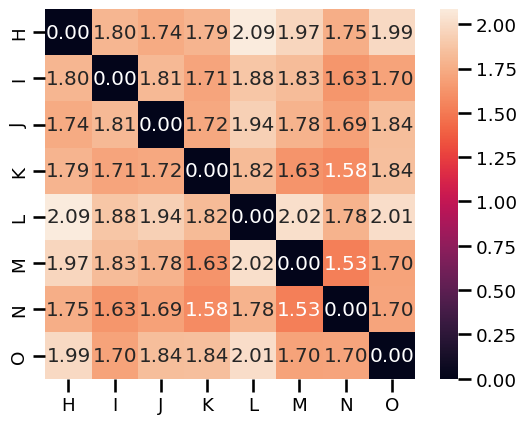

In [87]:
import seaborn as sns

sns.set_context('talk', font_scale=0.8)
sns.heatmap(distance , xticklabels=sorted(sample_mas), yticklabels=sorted(sample_mas), square=True, annot=True, fmt=".2f")

[[0.         1.79775334 1.74253999 1.79134205 2.08558701 1.96835429
  1.75168765 1.98668603]
 [1.79775334 0.         1.81043982 1.70706757 1.87688877 1.82584999
  1.63331397 1.69781127]
 [1.74253999 1.81043982 0.         1.72424458 1.93713783 1.77874305
  1.68865811 1.83994689]
 [1.79134205 1.70706757 1.72424458 0.         1.81901113 1.62700474
  1.58425502 1.84214566]
 [2.08558701 1.87688877 1.93713783 1.81901113 0.         2.019358
  1.77730021 2.0091585 ]
 [1.96835429 1.82584999 1.77874305 1.62700474 2.019358   0.
  1.52568281 1.7006346 ]
 [1.75168765 1.63331397 1.68865811 1.58425502 1.77730021 1.52568281
  0.         1.70295666]
 [1.98668603 1.69781127 1.83994689 1.84214566 2.0091585  1.7006346
  1.70295666 0.        ]]
Unifying 5 and 6
New cluster: ['M', 'N']
i, k=(5, 0)
i, k=(5, 1)
i, k=(5, 2)
i, k=(5, 3)
i, k=(5, 4)
i, k=(5, 6)
Clusters: [['H'], ['I'], ['J'], ['K'], ['L'], ['M', 'N'], ['O']]
[[0.         1.79775334 1.74253999 1.79134205 2.08558701 1.86002097
  1.98668603]
 [1.79

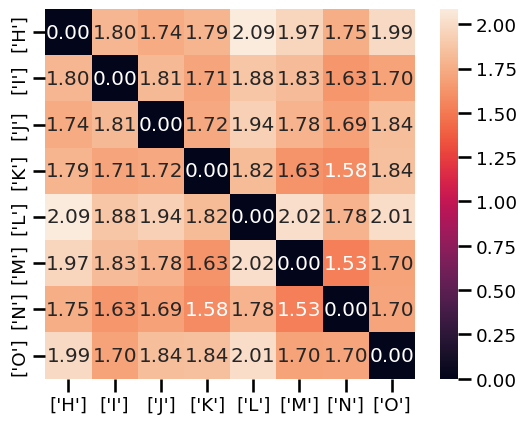

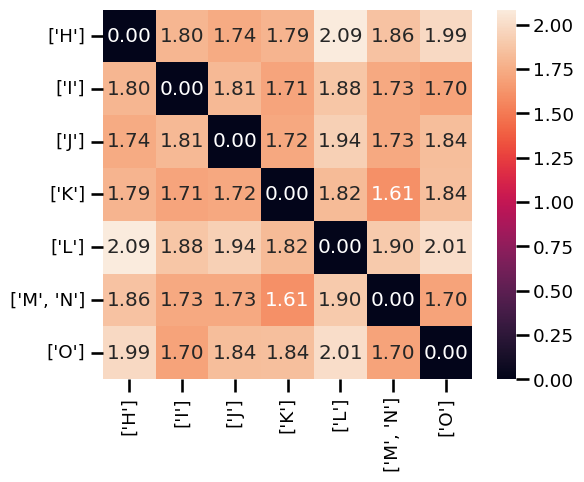

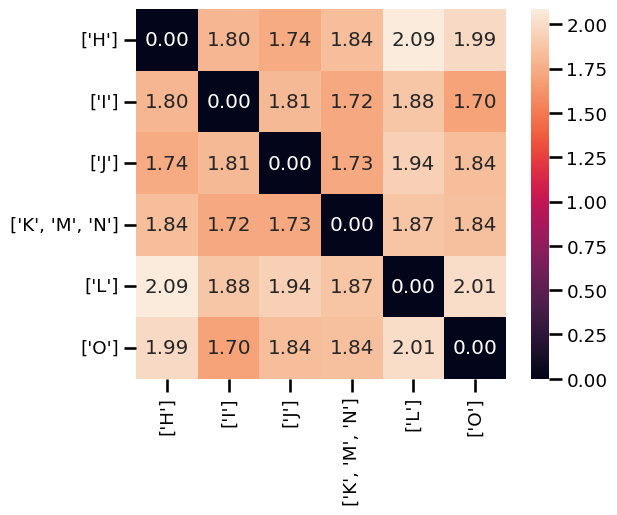

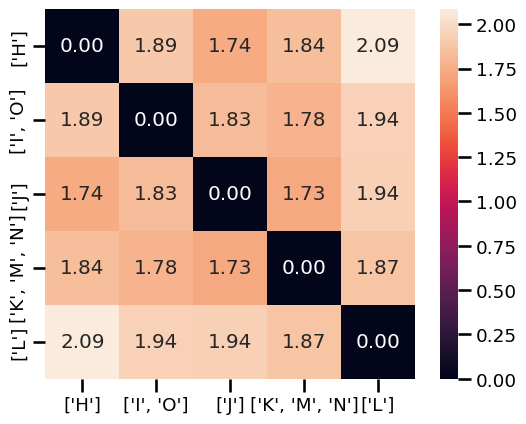

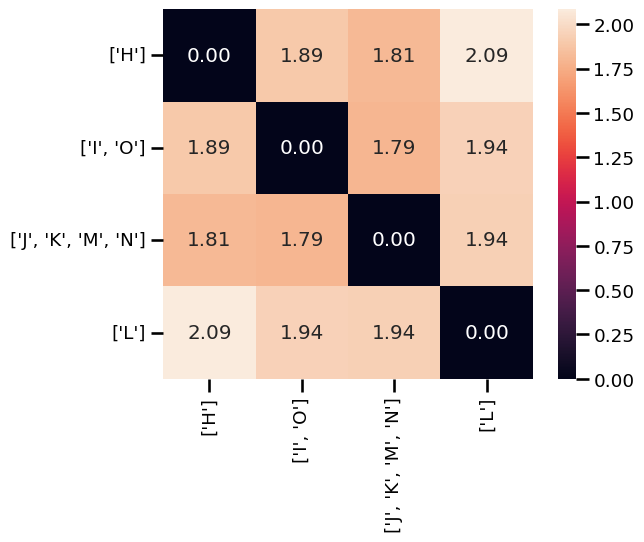

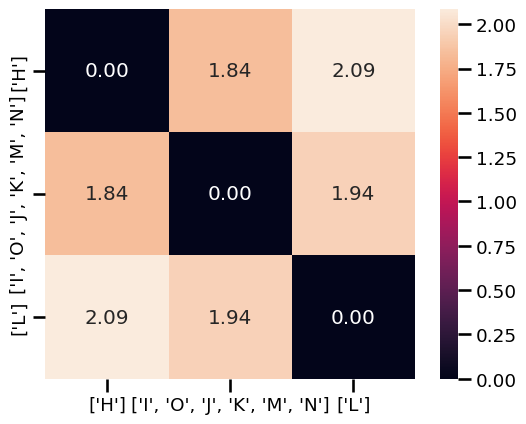

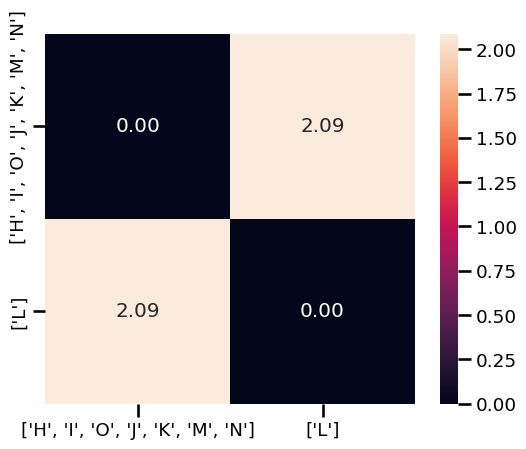

<Figure size 640x480 with 0 Axes>

In [89]:
def wpgma(mat):
    mat = np.copy(mat)
    n = len(mat)
    clusters = [[chr(ord('H')+i)] for i in range(n)]
    while len(clusters) > 1:
        sns.heatmap(mat , xticklabels=clusters, yticklabels=clusters, square=True, annot=True, fmt=".2f")
        aux = 1000.0 * np.diag(np.ones(mat.shape[0]))
        print(mat)
        i, j = np.unravel_index(np.argmin(mat + aux), mat.shape)
        print(f"Unifying {i} and {j}")
        new_cluster = clusters[i] + clusters[j]
        print(f"New cluster: {new_cluster}")
        len_i = len(clusters[i])
        len_j = len(clusters[j])
        clusters[i] = new_cluster
        del clusters[j]
        for k, cluster in enumerate(clusters):
            if k == i:
                continue
            print(f"{i, k=}")
            mat[i, k] = (mat[i, k] * len_i + mat[j, k] * len_j) / (len_i + len_j)
            mat[k, i] = mat[i, k]
        plt.figure()
        mat = np.delete(mat, j, axis=0)
        mat = np.delete(mat, j, axis=1)
        yield clusters

for l in wpgma(distance):
    print(f"Clusters: {l}")